**Sam Alim Ramadhan**

**1103210236**

**Lec. 7**

**XGBoost**

**melb_data.csv**

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from google.colab import drive

# **Import CSV**

In [2]:
# Mount drive dan baca data dari file CSV
drive.mount('/content/drive')
url = "/content/drive/MyDrive/Machine Learning/melb_data.csv"
data = pd.read_csv(url)
data.info()
data = data.dropna()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non

# **Heatmap**

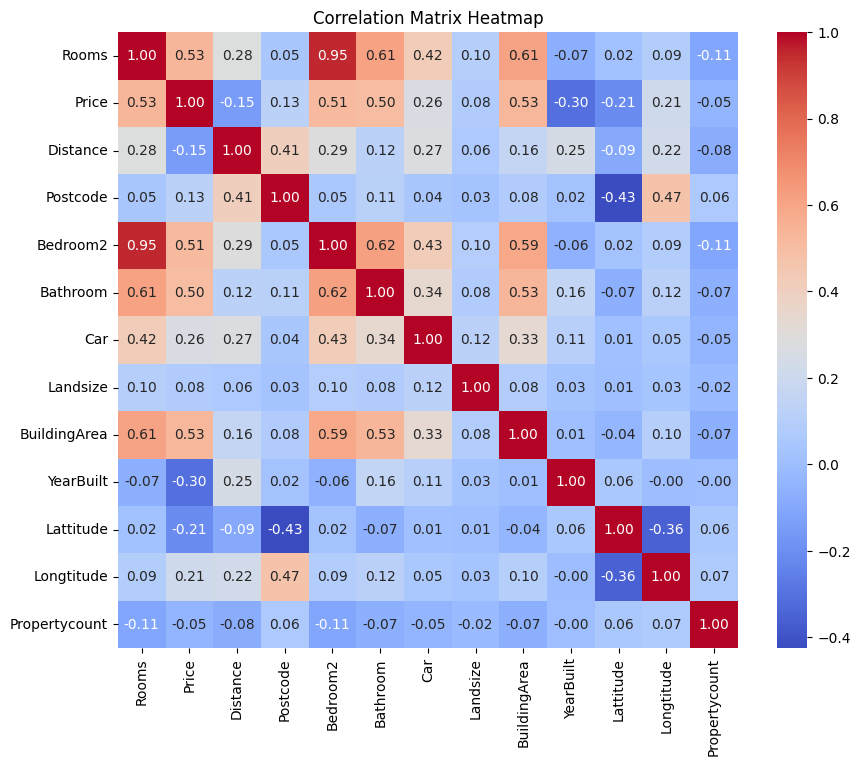

In [3]:
# Hilangkan kolom tidak penting
data = data.drop(columns=['Unnamed: 0'])

# Identifikasi kolom numerik
num = data.select_dtypes(include = ['number']).columns

# Hitung Matriks Korelasi
corr_mat = data[num].corr()

# Visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Pair Plot**

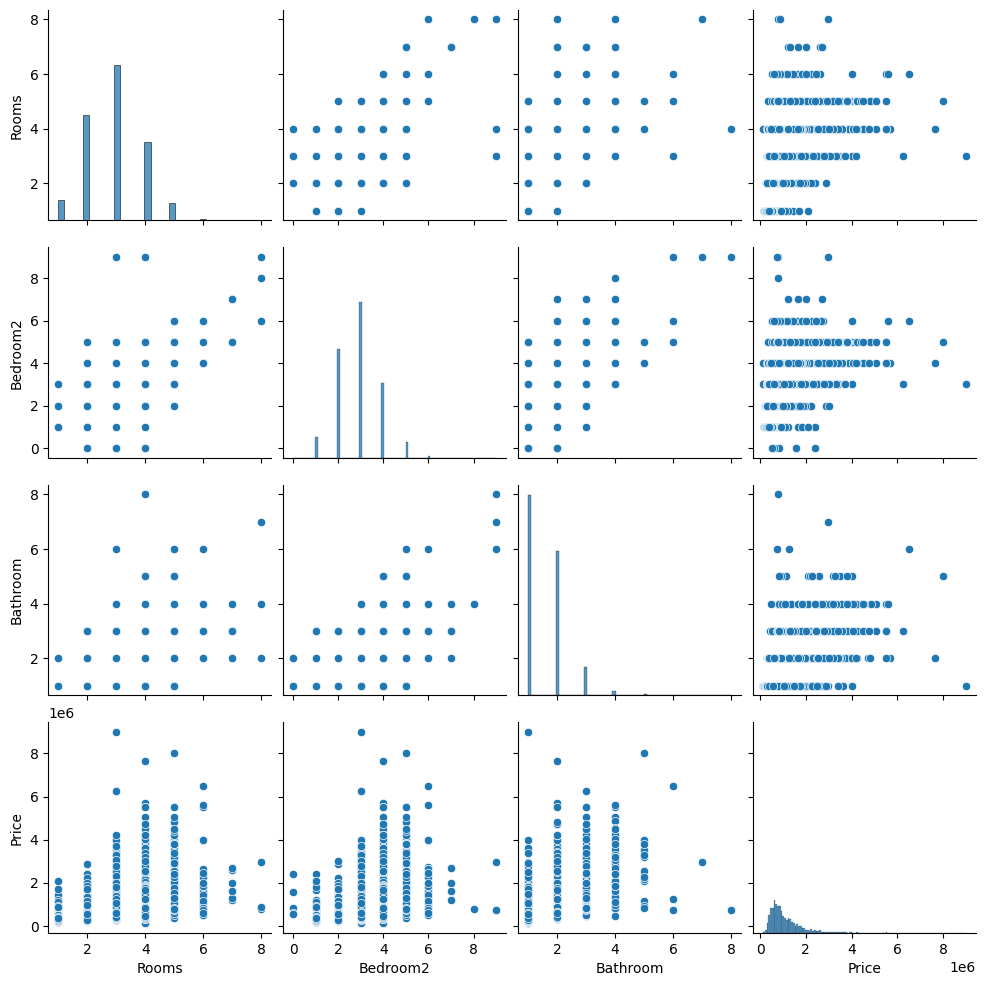

In [4]:
# Mengambil kolom tertentu
select_col = ['Rooms', 'Bedroom2', 'Bathroom', 'Price']
data = data[select_col]

# Visualisasi
sns.pairplot(data)
plt.show()

# **Training Model**

In [5]:
# Datasplit
X = data.drop('Price', axis = 1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Train data dengan XGBoost
xgb_train = xgb.XGBRegressor()
xgb_train.fit(X_train, y_train)

# Train data dengan Random Forest
rf_train = RandomForestRegressor()
rf_train.fit(X_train, y_train)

# Train data dengan Decision Tree
dt_train = DecisionTreeRegressor()
dt_train.fit(X_train, y_train)

DecisionTreeRegressor()

# **Evaluasi Model**

In [7]:
# Membuat fungsi untuk evaluasi
def evaluasi(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae

# Evaluasi model XGBoost
xgb_mae = evaluasi(xgb_train, X_test, y_test)
print(f"XGBoost Mean Squared Error: {xgb_mae}")

# Evaluasi model Random Forest
rf_mae = evaluasi(rf_train, X_test, y_test)
print(f"Random Forest Mean Squared Error: {rf_mae}")

# Evaluasi model Decision Tree
dt_mae = evaluasi(dt_train, X_test, y_test)
print(f"Decision Tree Mean Squared Error: {dt_mae}")

XGBoost Mean Squared Error: 385041.8560987903
Random Forest Mean Squared Error: 384502.9042526629
Decision Tree Mean Squared Error: 385002.6151788879
